<a href="https://colab.research.google.com/github/ashi-sharma/Real-estate-price-prediction/blob/master/SVRModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import the Dataset**

In [4]:
data = pd.read_csv("/content/datasets_88705_204267_Real estate.csv")
print(data.shape)
data.head()

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
data.drop(['No','X5 latitude','X6 longitude'],axis = 1,inplace = True)

**Handling Missing Data**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 16.3 KB


**Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(data)
data = scaler.transform(data)
data=pd.DataFrame(data,columns=['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores  ',' Y house price of unit area'])
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,-0.823683,1.255628,-0.792495,2.007407,-0.005901
1,-0.823683,0.157086,-0.616612,1.667503,0.310507
2,1.541151,-0.387791,-0.414015,0.307885,0.685782
3,1.246435,-0.387791,-0.414015,0.307885,1.237656
4,-1.121951,-1.117223,-0.549997,0.307885,0.376732


**Splitting dataset into training and testing data**

In [8]:
from sklearn import model_selection
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y)

**Training the model**

In [9]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)

**Testing the model**

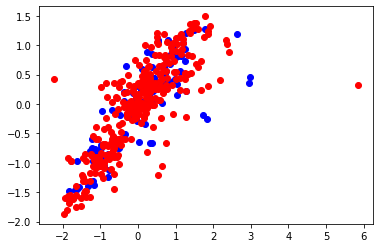

In [11]:
plt.scatter(y_test,y_pred,color='blue')
plt.scatter(y_train,regressor.predict(x_train),color='red')
plt.show()

**Confusion matrix**

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6350610521785045